In [8]:
%matplotlib inline

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier
from graphviz import Source   # Install it using: conda install -c conda-forge python-graphviz
from IPython.display import display, SVG

## Decision tree for iris dataset

In [2]:
# Load dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['class'] = iris.target_names[iris.target]

# Train/test mask
np.random.seed(42)
mask = np.random.rand(df.shape[0]) < 0.7

Let's fit entropy based tree on iris dataset.

----------------------------------------------------------------------
Tree for max_dept = 1

Correctly identified on train set - 70.48%, on test set - 57.78%


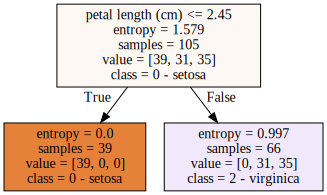

----------------------------------------------------------------------
Tree for max_dept = 2

Correctly identified on train set - 96.19%, on test set - 95.56%


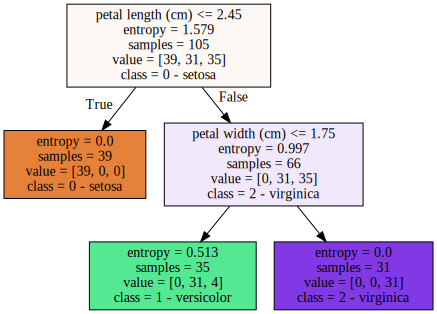

----------------------------------------------------------------------
Tree for max_dept = 3

Correctly identified on train set - 97.14%, on test set - 97.78%


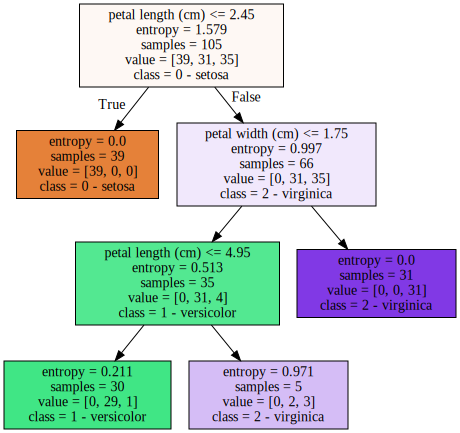

In [3]:
for max_depth in range(1, 4):
    print('-' * 70 + '\nTree for max_dept = {0}\n'.format(max_depth))
    tree = DecisionTreeClassifier(max_depth=max_depth, criterion='entropy')
    # Fit on train data
    tree.fit(df[mask].drop('class', axis=1), df[mask]['class'])

    # Make prediction and evaluate performance
    pred = tree.predict(df.drop('class', axis=1))
    print('Correctly identified on train set - {0:.02%}, on test set - {1:.02%}'.format(
        (pred[mask] == df[mask]['class']).mean(),        # train set
        (pred[~mask] == df[~mask]['class']).mean()))     # test set

    # Make a nice plot
    graph = Source(export_graphviz(tree, out_file=None, filled = True,
                                   feature_names=df.drop('class', axis=1).columns,
                                   class_names=['0 - setosa', '1 - versicolor', '2 - virginica']))
    display(SVG(graph.pipe(format='svg')))

As we can see simple decision tree works quite good for iris dataset.

## Larger dataset and overfit example

Let's load another legendary dataset containing classification problem. If you are interested in dataset details see [UCI](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29).

In [4]:
from sklearn.datasets import load_breast_cancer

# Load dataset
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df['class'] = cancer.target_names[cancer.target]

# Train/test mask
np.random.seed(42)
mask = np.random.rand(df.shape[0]) < 0.8

df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
df.groupby('class').size()

class
benign       357
malignant    212
dtype: int64

As before we will fit multiple trees with different max_depth's. This time let's plot performance on train and test sets.

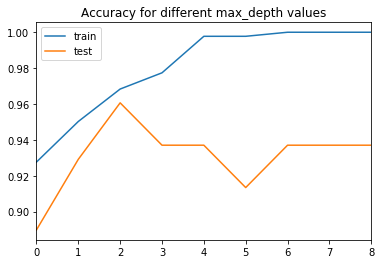

In [6]:
L = []
for max_depth in range(1, 10):
    tree = DecisionTreeClassifier(max_depth=max_depth, criterion='entropy', random_state=42)
    # Fit on train data
    tree.fit(df[mask].drop('class', axis=1), df[mask]['class'])

    # Make prediction and evaluate performance
    pred = tree.predict(df.drop('class', axis=1))
    L.append([(pred[mask] == df[mask]['class']).mean(),        # train set
              (pred[~mask] == df[~mask]['class']).mean()])     # test set
    
pd.DataFrame(L, columns=['train', 'test']).plot(
    title='Accuracy for different max_depth values')

This is a good illustration of overfitting case. How can we prevent it in this case?

# Random forests

In [53]:
# Defining the base estimator
base = DecisionTreeClassifier(max_depth=5, splitter='best',
                    max_features='sqrt', criterion='entropy')

# Create Random Forest 
ensemble = BaggingClassifier(base_estimator=base, n_estimators=1000,
                             bootstrap=True)

In [54]:
%%time

ensemble.fit(df[mask].drop('class', axis=1), df[mask]['class'])
pred = tree.predict(df.drop('class', axis=1))

print('Correctly identified on train set - {0:.02%}, on test set - {1:.02%}\n'.format(
    (pred[mask] == df[mask]['class']).mean(),        # train set
    (pred[~mask] == df[~mask]['class']).mean()))     # test set

Correctly identified on train set - 100.00%, on test set - 93.70%

CPU times: user 907 ms, sys: 3.23 ms, total: 910 ms
Wall time: 910 ms


# ExtraTrees

In [55]:
# Defining the base estimator
base = DecisionTreeClassifier(max_depth=5, splitter='random',
                    max_features='sqrt', criterion='entropy')

# Create Random Forest 
ensemble = BaggingClassifier(base_estimator=base, n_estimators=1000,
                             bootstrap=False)

In [56]:
%%time

ensemble.fit(df[mask].drop('class', axis=1), df[mask]['class'])
pred = tree.predict(df.drop('class', axis=1))

print('Correctly identified on train set - {0:.02%}, on test set - {1:.02%}\n'.format(
    (pred[mask] == df[mask]['class']).mean(),        # train set
    (pred[~mask] == df[~mask]['class']).mean()))     # test set

Correctly identified on train set - 100.00%, on test set - 93.70%

CPU times: user 541 ms, sys: 0 ns, total: 541 ms
Wall time: 541 ms
